In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date')

In [3]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [4]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
df_2016 = df_2016.set_index('Created_Date')

In [5]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [6]:
train_years = pd.concat([df_2014, df_2015])

In [7]:
df_weather = pd.get_dummies(train_years['Weather'])

In [8]:
train_years = pd.concat([train_years, df_weather],axis=1,join='inner')

In [9]:
train_years.drop('Weather', axis=1, inplace=True)

In [10]:
complaint_type = ['Building_Conditions', 'General_Request', 
                 'Living_Conditions', 'Parking_Enforcement', 
                 'Signal_Sign_Repair', 'Street_Sidewalk_Repair']

weather_types = ['Building_Conditions', 'Max_TempF', 'Fog', 'Fog-Rain', 'Fog-Rain-Snow', 
                 'Fog-Rain-Thunderstorm', 'Fog-Snow',
                 'Rain', 'Rain-Snow',
                 'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                 'Snow', 'Sunny']

feature_cols = ['General_Request', 'Building_Conditions',
                'Living_Conditions', 'Parking_Enforcement', 
                'Signal_Sign_Repair', 'Street_Sidewalk_Repair',
                'Max_TempF', 'day',
                'Fog', 'Fog-Rain',
                'Fog-Rain-Snow', 
                'Fog-Rain-Thunderstorm', 'Fog-Snow',
                'Rain', 'Rain-Snow',
                'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                'Snow', 'Sunny']

X = train_years[feature_cols]
y = train_years['Living_Conditions']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [12]:
y_test_2016 = df_2016.Max_TempF

In [13]:
clf = LogisticRegression()

In [14]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
clf.predict(X)

array([  155.,   263.,   235.,   154.,   169.,   433.,   412.,   384.,
         414.,   329.,   251.,   218.,   410.,   481.,   478.,   453.,
         285.,   231.,   209.,   341.,   261.,   244.,   248.,   243.,
         206.,   177.,   342.,   308.,   308.,   308.,   283.,   267.,
         238.,   285.,   381.,   532.,   261.,   218.,   211.,   186.,
         262.,   252.,   277.,   456.,   532.,   172.,   162.,   265.,
         268.,   393.,   361.,   532.,   240.,   303.,   458.,   499.,
         381.,   378.,   366.,   339.,   339.,   323.,   318.,   352.,
         356.,   366.,   275.,   343.,   467.,   705.,   635.,   630.,
         511.,   341.,   343.,   606.,   741.,   675.,   705.,   511.,
         322.,   389.,   653.,   741.,   567.,   741.,   705.,   488.,
         536.,   593.,   511.,   714.,   635.,   714.,   486.,   285.,
         705.,   756.,   705.,   633.,   643.,   403.,   406.,   701.,
         714.,   593.,   567.,  1029.,   270.,   406.,   635.,   714.,
      

In [16]:
df_pred = pd.DataFrame({'pred':clf.predict(X_test),'actual':y_test})

In [17]:
df_pred.sort_index(axis=0, inplace=True)

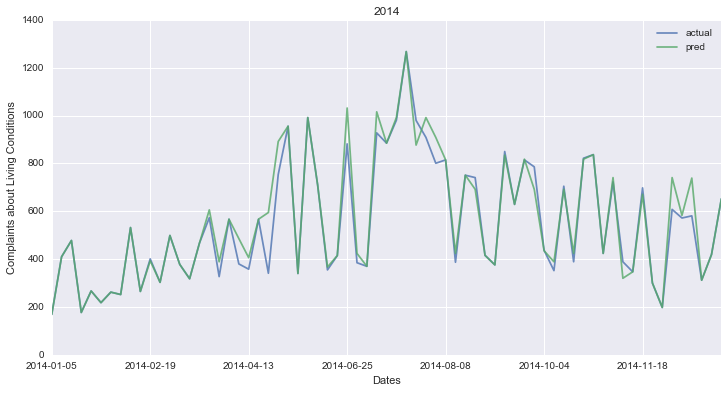

In [18]:
df_pred[pd.to_datetime(df_pred.index).year==2014].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2014')
plt.xlabel('Dates')
plt.ylabel('Complaints about Living Conditions')

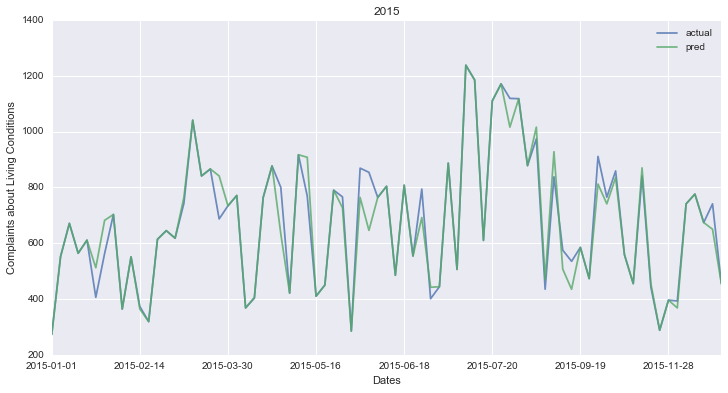

In [19]:
df_pred[pd.to_datetime(df_pred.index).year==2015].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2015')
plt.xlabel('Dates')
plt.ylabel('Complaints about Living Conditions')